#  Part A - 30 Marks

### • DOMAIN: Telecom
### • CONTEXT: A telecom company wants to use their historical customer data to predict behaviour to retain customers. You can analyse allrelevant customer data and develop focused customer retention programs.
### • DATA DESCRIPTION: Each row represents a customer, each column contains customer’s attributes described on the column Metadata. Thedata set includes information about:
  ### • Customers who left within the last month – the column is called Churn
  ### • Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device         protection, tech support, andstreaming TV and movies
  ### • Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
  ### • Demographic info about customers – gender, age range, and if they have partners and dependents
 ### PROJECT OBJECTIVE: To Build a model that will help to identify the potential customers who have a higher probability to churn. This helps the company to understand the pinpoints and patterns of customer churn and will increase the focus on strategizing customer retention
  ### STEPS AND TASK [30 Marks]:
  
  ### Q1: Data Understanding & Exploration: [5 Marks]

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline

### A. Read ‘TelcomCustomer-Churn_1.csv’ as a DataFrame and assign it to a variable. [1 Mark]

In [2]:
import pandas as pd

data_churn_1 = pd.read_csv("TelcomCustomer-Churn_1.csv")
print(data_churn_1.describe())
print(data_churn_1.shape)
data_churn_1.head()

       SeniorCitizen       tenure
count    7043.000000  7043.000000
mean        0.162147    32.371149
std         0.368612    24.559481
min         0.000000     0.000000
25%         0.000000     9.000000
50%         0.000000    29.000000
75%         0.000000    55.000000
max         1.000000    72.000000
(7043, 10)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No


### B. Read ‘TelcomCustomer-Churn_2.csv’ as a DataFrame and assign it to a variable. [1 Mark]

In [3]:
data_churn_2 = pd.read_csv("TelcomCustomer-Churn_2.csv")
print(data_churn_2.describe())
print(data_churn_2.shape)
data_churn_2.head()

       MonthlyCharges
count     7043.000000
mean        64.761692
std         30.090047
min         18.250000
25%         35.500000
50%         70.350000
75%         89.850000
max        118.750000
(7043, 12)


,customerID,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


 ### C. Merge both the DataFrames on key ‘customerID’ to form a single DataFrame [2 Mark]

In [4]:
data_churn = data_churn_1.merge(right = data_churn_2, on = "customerID")
print(data_churn.describe())
print(data_churn.shape)

data_churn.head()

       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000
(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### D. Verify if all the columns are incorporated in the merged DataFrame by using simple comparison Operator in Python. [1 Marks]

In [38]:
assert((data_churn_1[:][:] == data_churn[:][data_churn_1.columns]).bool)
assert((data_churn_2[:][:] == data_churn[:][data_churn_2.columns]).bool)

## Data Cleaning & Analysis: [5 Marks]
### A. Impute missing/unexpected values in the DataFrame. [2 Marks]

In [7]:
print(data_churn.isna().isna().sum())
data_churn.info()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   obj

#### There are no any missing values in dataset

In [8]:
for attribute in data_churn.columns:
    print(attribute, ":    ", data_churn[attribute].unique(), "\n")

customerID :     ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK'] 

gender :     ['Female' 'Male'] 

SeniorCitizen :     [0 1] 

Partner :     ['Yes' 'No'] 

Dependents :     ['No' 'Yes'] 

tenure :     [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39] 

PhoneService :     ['No' 'Yes'] 

MultipleLines :     ['No phone service' 'No' 'Yes'] 

InternetService :     ['DSL' 'Fiber optic' 'No'] 

OnlineSecurity :     ['No' 'Yes' 'No internet service'] 

OnlineBackup :     ['Yes' 'No' 'No internet service'] 

DeviceProtection :     ['No' 'Yes' 'No internet service'] 

TechSupport :     ['No' 'Yes' 'No internet service'] 

StreamingTV :     ['No' 'Yes' 'No internet service'] 

StreamingMovies :     ['No' 'Yes' 'No internet service'] 

Contract :     ['Month-to-month' 'One year' 'Two year

#### things look well for each column's values , atleast on the surface



### B. Make sure all the variables with continuous values are of ‘Float’ type. [2 Marks]
#### [For Example: MonthlyCharges, TotalCharges]

In [9]:
print(data_churn.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [10]:
data = data_churn.copy()
#data.astype({"TotalCharges" : "float64"})
#data[["TotalCharges"]] = data[["TotalCharges"]].applymap(pd.to_numeric)#lambda x: float(x))
#data[["TotalCharges"]] = data[["TotalCharges"]].replace("   ", str(data[["TotalCharges"]].mean()))
data["TotalCharges"] = data["TotalCharges"].apply(pd.to_numeric, errors='coerce')
#data.astype({"TotalCharges" : "float64"})
#data.convert_dtypes()

In [11]:
data[["MonthlyCharges"]].value_counts()

MonthlyCharges
20.05             61
19.85             45
19.95             44
19.90             44
19.70             43
                  ..
67.60              1
67.65              1
67.70              1
67.75              1
118.75             1
Length: 1585, dtype: int64

In [12]:
print(data.isna().sum())

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


#### It looks null values in dataset 

In [13]:
data = data.fillna(data["MonthlyCharges"].mean())
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### Now the type of both the attribute are float64 

### C. Create a function that will accept a DataFrame as input and return pie-charts for all the appropriate Categorical features. Clearly show percentagedistribution in the pie-chart. [4 Marks] 

In [15]:
#def create_pie_chart(dataFrame):
#    for col in dataFrame.columns:

data.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [16]:
import matplotlib.pyplot as plt
import numpy as np

#figure, axes = plt.subplots(2,2)
#data2["SeniorCitizen"].value_counts().plot(kind = "pie", y = "SeniorCitizen", autopct="%1.0f%%", figsize=(18,12), ax = axes[0,0])
#data2["PaymentMethod"].value_counts().plot(kind = "pie", y = "PaymentMethod", autopct="%1.0f%%", figsize=(18,12), ax = axes[0,1])
#plt.delaxes()
#plt.axis("off")
#plt.show()

In [17]:
def make_pie_charts(data_frame):
    cols = get_categorical_attributes(data_frame)
    num_dims = int(np.sqrt(len(cols)) + 1)
    figure, axes = plt.subplots(num_dims, num_dims, figsize = (24, 18), squeeze = False)
    col_index = 0
    index = 0 
    for row in range(0, num_dims):
        for col in range(0, num_dims):
            #print(row, col)
            #print(col_index)
            if index < len(cols):
                #print(cols[index])
                data_frame[cols[index]].value_counts().plot(kind = "pie", y = cols[index], autopct="%1.0f%%", ax = axes[row,col])
            col_index = col_index + 1
            if index < len(cols):
                index = index + 1
        col_index = 0
        if index >= len(cols):
            break
    
    plt.axis("off")
    plt.delaxes()
    plt.show()

In [18]:
def get_categorical_attributes(data_frame):
    categorical_attributes = []
    for attribute in data_frame.columns:
        if len(data_frame[attribute].value_counts()) > 50: #magic number, I'm assuming dataset doesn't have more than 50 unique categories 
            pass
        else:
            categorical_attributes.append(attribute)
    #print(categorical_attributes)
    return categorical_attributes 

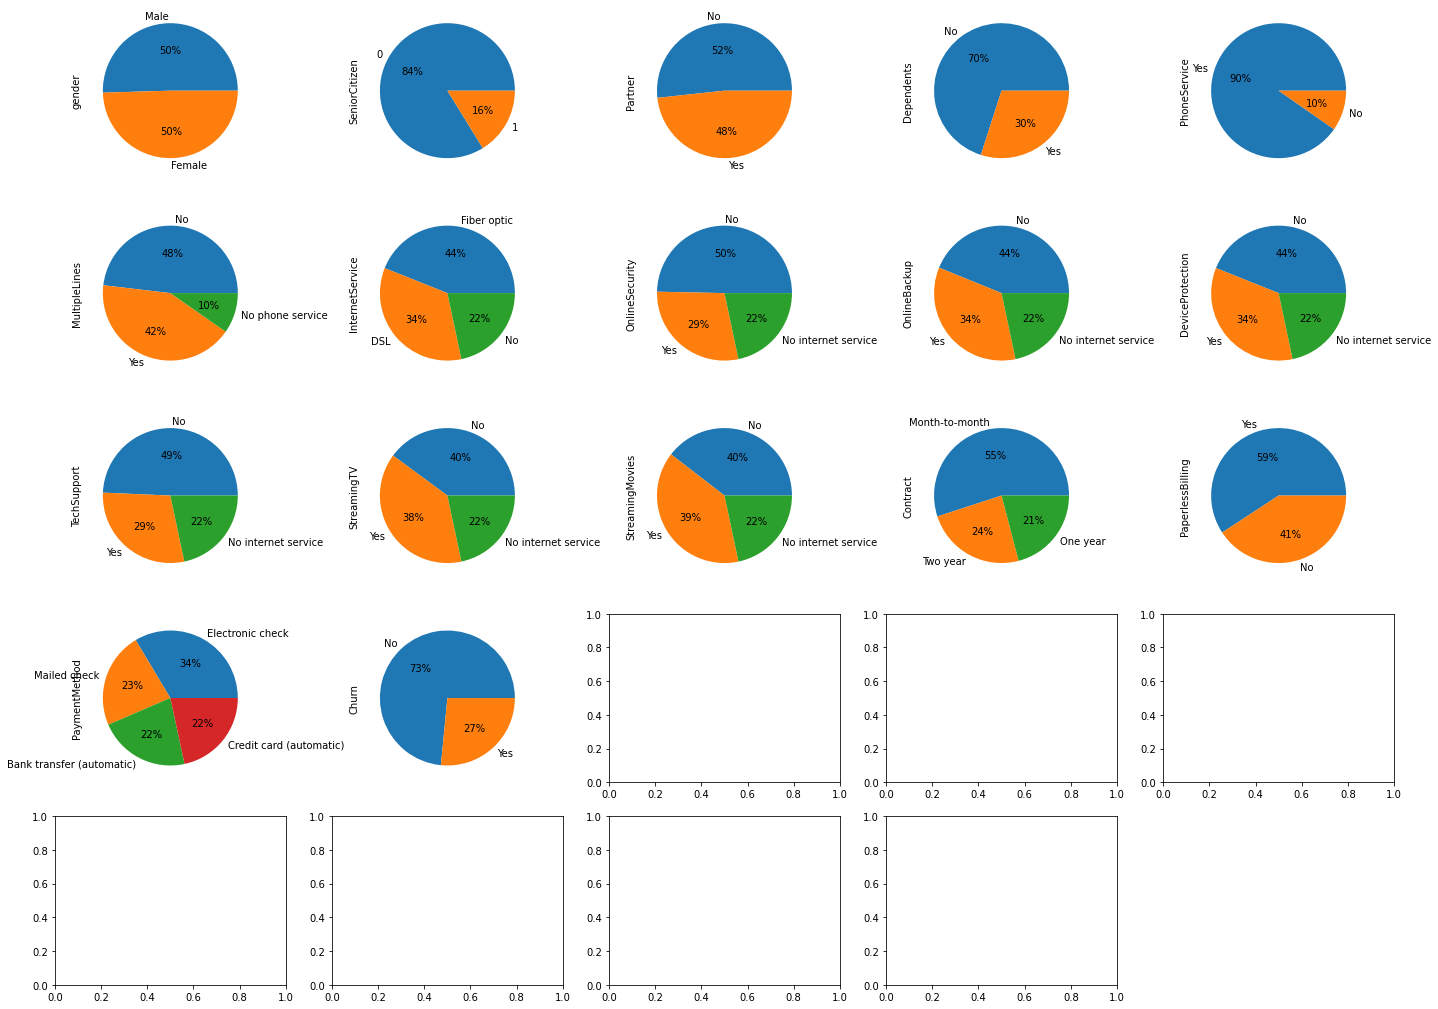

In [23]:
make_pie_charts(data)

### D. Share insights for Q2.c. [2 Marks]

#### Answer
#### - most customers use paperless billing, but a non trivial amount(41%) still use physical copies of bills
#### - half the customers with internet services purchased streaming TV services(38%), half didn't(40%)
#### - roughly 25% of customers don't have internet service
#### - roughly 15% of all customers are senior citizens
#### - roughly 27% of customers in dataset have churned
#### - Half the customers haven't purchased online security(atleast from this company, don't know if they bought 3rd party)
#### - nearly half the customers have multiple lines
#### - roughly half the customers have a partner
#### - only 30% of the customers have dependents
#### - roughly half the customers have internet service via fiber optic cable, ~30% via DSL
#### - half the customers don't use any kind of tech support
#### - half the customers don't have online backups
#### - half the customers renew their contract on a monthly basis, the rest are equally divided into renewing once a year or once every            2 years
#### - modes of bill payment are uniform, with all mediums having equal prevalence
#### - half the customers with internet services purchased movie streaming services(38%), half didn't(40%)


### E. Encode all the appropriate Categorical features with the best suitable approach. [2 Marks]

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [27]:
for attr in get_categorical_attributes(data):
    print(data[attr].value_counts())
    print("\n")

Male      3555
Female    3488
Name: gender, dtype: int64


0    5901
1    1142
Name: SeniorCitizen, dtype: int64


No     3641
Yes    3402
Name: Partner, dtype: int64


No     4933
Yes    2110
Name: Dependents, dtype: int64


Yes    6361
No      682
Name: PhoneService, dtype: int64


No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


No                     28

In [28]:
data3 = data.copy()
target_attr = data3.iloc[:,-1]
target_attr

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

In [29]:
data3 = data3.drop("Churn", axis=1)
data3

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60


In [30]:
for attribute in get_categorical_attributes(data3):
    data3 = pd.concat([data3, pd.get_dummies(data3[attribute], prefix = attribute)], axis = 1 )
    data3 = data3.drop(attribute, axis = 1)
data3["Churn"]  = target_attr

In [31]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 48 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               7043 non-null   object 
 1   tenure                                   7043 non-null   int64  
 2   MonthlyCharges                           7043 non-null   float64
 3   TotalCharges                             7043 non-null   float64
 4   gender_Female                            7043 non-null   uint8  
 5   gender_Male                              7043 non-null   uint8  
 6   SeniorCitizen_0                          7043 non-null   uint8  
 7   SeniorCitizen_1                          7043 non-null   uint8  
 8   Partner_No                               7043 non-null   uint8  
 9   Partner_Yes                              7043 non-null   uint8  
 10  Dependents_No                            7043 no

In [32]:
data3

,customerID,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,7590-VHVEG,1,29.85,29.85,1,0,1,0,0,1,...,1,0,0,0,1,0,0,1,0,No
1,5575-GNVDE,34,56.95,1889.50,0,1,1,0,1,0,...,0,1,0,1,0,0,0,0,1,No
2,3668-QPYBK,2,53.85,108.15,0,1,1,0,1,0,...,1,0,0,0,1,0,0,0,1,Yes
3,7795-CFOCW,45,42.30,1840.75,0,1,1,0,1,0,...,0,1,0,1,0,1,0,0,0,No
4,9237-HQITU,2,70.70,151.65,1,0,1,0,1,0,...,1,0,0,0,1,0,0,1,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,24,84.80,1990.50,0,1,1,0,0,1,...,0,1,0,0,1,0,0,0,1,No
7039,2234-XADUH,72,103.20,7362.90,1,0,1,0,0,1,...,0,1,0,0,1,0,1,0,0,No
7040,4801-JZAZL,11,29.60,346.45,1,0,1,0,0,1,...,1,0,0,0,1,0,0,1,0,No
7041,8361-LTMKD,4,74.40,306.60,0,1,0,1,0,1,...,1,0,0,0,1,0,0,0,1,Yes


### F. Split the data into 80% train and 20% test. [1 Marks]

In [33]:
from sklearn.model_selection import train_test_split
X = data3.iloc[:, 1:-1]
y = data3.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=1)

### G. Normalize/Standardize the data with the best suitable approach. [2 Marks]

In [34]:
from sklearn.preprocessing import StandardScaler

def scale_data(data_frame, col_attributes):
    data = data_frame.copy()
    for col in col_attributes:
        data[col] = StandardScaler().fit_transform(data_frame[[col]])
    return data
#X_train
X_train_scaled = scale_data(X_train, ["tenure", "MonthlyCharges", "TotalCharges"])
X_test_scaled = scale_data(X_test, ["tenure", "MonthlyCharges", "TotalCharges"])

#X_train_scaled = StandardScaler().fit_transform(X_train)
#X_test_scaled = StandardScaler().fit_transform(X_test)
#pd.DataFrame(X_train_scaled)

In [35]:
y_train = y_train.replace({"Yes" : 1, "No" : 0})
y_test = y_test.replace({"Yes" : 1, "No" : 0})

type(pd.DataFrame(y_train))

pandas.core.frame.DataFrame

## 3. Model building and Improvement: [10 Marks]


#### A. Train a model using XGBoost. Also print best performing parameters along with train and test performance. [5 Marks] 

In [36]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
data = xgb.DMatrix(X_train_scaled, label = y_train)
#dtrain = xgb.DMatrix(data, label=label)


xgb_classifier = xgb.XGBClassifier(objective ='reg:logistic', booster = "gblinear", colsample_bytree = 1, learning_rate = 100,
                max_depth = 1, alpha = 1, n_estimators = 1, use_label_encoder = False)
xgb_classifier.fit(X_train_scaled ,y_train)


preds = xgb_classifier.predict(X_test_scaled)
accuracy = np.sqrt(accuracy_score(y_test, preds))
print(f"accuracy: {accuracy} \n\n")
print("parameters of current model:\n")
xgb_classifier

[19:21:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


accuracy: 0.7568002568807454 


parameters of current model:



XGBClassifier(alpha=1, base_score=0.5, booster='gblinear',
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              enable_categorical=False, gamma=None, gpu_id=-1,
              importance_type=None, interaction_constraints=None,
              learning_rate=100, max_delta_step=None, max_depth=1,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1, n_jobs=8, num_parallel_tree=None,
              objective='reg:logistic', predictor=None, random_state=0,
              reg_alpha=0, reg_lambda=0, scale_pos_weight=1, subsample=None,
              tree_method=None, use_label_encoder=False, validate_parameters=1, ...)

### B. Improve performance of the XGBoost as much as possible. Also print best performing parameters along with train and test performance. [5 Marks]




#### Here, i'll be using hyperplot, a library thet searches the parameter space using Bayesian optimization because  there are too many parameters to do traditional hyperparameter tuning.

In [39]:
!pip install hyperopt

In [40]:
import numpy as np
from sklearn.model_selection import cross_val_score
from hyperopt import STATUS_OK, fmin, tpe, Trials, hp
from sklearn.metrics import accuracy_score
import warnings
warnings.simplefilter("ignore")

parameter_space= {
    "learning_rate": hp.loguniform("learning_rate", np.log(0.01), np.log(1)),
    "max_depth": hp.quniform("max_depth", 1, 1000, 1),
    "n_estimators": hp.quniform("n_estimators", 1, 20, 1),
    "num_leaves": hp.quniform("num_leaves", 5, 500, 1),
    "booster": hp.choice("booster", ["gbtree", "dart", "gblinear"]),
    "colsample_bytree": hp.uniform("colsample_by_tree", 0.6, 1.0),
    "gamma" : hp.quniform("gamma", 0, 1000, 1),
    "objective" : hp.choice("objective", ["reg:logistic", "binary:logistic"])
}

def objective_func(parameter_space):
    classifier = xgb.XGBClassifier(
                    n_estimators = int(parameter_space["n_estimators"]),
                    gamma = int(parameter_space["gamma"]),
                    colsample_bytree = int(parameter_space["colsample_bytree"]),
                    booster = parameter_space["booster"],
                    learning_rate = parameter_space["learning_rate"],
                    max_depth = int(parameter_space["max_depth"]),
                    num_leaves = int(parameter_space["num_leaves"]),
                    objective = parameter_space["objective"],
                    use_label_encoder = False
    )
    
    evaluation = [( X_train_scaled, y_train), ( X_test_scaled, y_test)]
    
    classifier.fit(X_train_scaled, y_train,
            #eval_set=evaluation, 
            #eval_metric="auc",
            #early_stopping_rounds=10,
            verbose=False)
    

    pred = classifier.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, pred)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

trial = Trials()
best_param = fmin(objective_func,
                  parameter_space,
                  algo=tpe.suggest, 
                  max_evals=100, 
                  trials=Trials(),
                 )#rstate= 1)#np.random.RandomState(1))

best_param

[19:52:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576:                   
Parameters: { "colsample_bytree", "gamma", "max_depth", "num_leaves" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


SCORE:                                                                                                                 
0.7714691270404542                                                                                                     
[19:52:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576:                   
Parameters: { "num_leaves" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenl

{'booster': 2,
 'colsample_by_tree': 0.8356667010760213,
 'gamma': 783.0,
 'learning_rate': 0.17258278463276333,
 'max_depth': 586.0,
 'n_estimators': 6.0,
 'num_leaves': 356.0,
 'objective': 1}

#### Final test accuracy is 81% with the above hyper-parameters 

In [42]:
classifier = xgb.XGBClassifier(booster = "gblinear",
 colsample_by_tree =  0.8735078153839764,
 gamma = 555,
 learning_rate = 0.07803411774783334,
 max_depth = 601,
 n_estimators = 19,
 num_leaves = 150,
 objective = "reg:logistic")
classifier.fit(X_train_scaled, y_train)
pred = classifier.predict(X_train_scaled)
accuracy = accuracy_score(y_train, pred)
print ("SCORE:", accuracy)

[19:55:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_by_tree", "gamma", "max_depth", "num_leaves" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


SCORE: 0.8010294639687611


#### Final train accuracy is 80%, close to test accuracy, meaning no overfitting occurred 

# Part B - 30 Marks

##  •DOMAIN: IT
###  •CONTEXT: The purpose is to build a machine learning work low that will work autonomously irrespective of Data and users can save efforts involved in building work lows for each dataset.
### PROJECT OBJECTIVE:Build a machine learning work low that will run autonomously with the csv file and return best performing model .
###  • STEPS AND TASK: [30 Marks]:
#### 1. Build a simple ML workflow which will accept a single ‘.csv’ file as input and return a trained base model that can be used for predictions. You can use 1 Dataset from Part 1 (single/merged).
#### 2. Create separate functions for various purposes.
#### 3. Various base models should be trained to select the best performing model
#### 4. Pickle file should be saved for the best performing model.

  ####        Include best coding practices in the code:
  ####            • Modularization
  ####            • Maintainability
  ####            • Well commented code etc


#### Preprocessing: input csv file ---> correctly identify data types ---> remove null values ---> normalize categorical data(assume OHE since no way to realize if data is ordinal or not) ---> split data into train and test ---> scale numerical data using StandardScaler

#### Training models: For categorical target variable: train logistic regression, KNN, and decision tree model #MIGHT_DO : XGBOOST

#### For numerical target variable: train linear regression, KNN, and decision tree model #MIGHT_DO : XGBOOST

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier


def preprocess_get_categorical_attributes(data_frame):
    categorical_attributes = []
    for attribute in (pd.DataFrame(data_frame)).columns:
        if len(data_frame[attribute].value_counts()) > 20: #magic number, I'm assuming dataset doesn't have more than 20 unique categories 
            pass
        else:
            categorical_attributes.append(attribute)
    #print(categorical_attributes)
    return categorical_attributes

In [44]:
def preprocess_one_hot_encoding(dataset):
    target_var_name = dataset.columns[-1]
    data = dataset.iloc[: , -1]
    for attribute in get_categorical_attributes(dataset):
        if target_var_name != attribute:
            dataset = pd.concat([dataset, pd.get_dummies(dataset[attribute], prefix = attribute)], axis = 1 )
            dataset = dataset.drop(attribute, axis = 1)
    if target_var_name in dataset.columns:
        dataset = dataset.drop(target_var_name, axis = 1)
        dataset[target_var_name]  = data
    dataset.info()
    return dataset


In [45]:
def preprocess_remove_null_vals(data_set):
    categorical_attributes = preprocess_get_categorical_attributes(data_set)
    #print(categorical_attributes)
    #print(data_set.columns)
    for attr in data_set.columns:
        if attr not in categorical_attributes:
            data_set[attr] = data_set[attr].apply(pd.to_numeric, errors = "coerce") #convert columns whose values are actually numeric,
                                                                                    #but got treated as string due to missing/unexpected values
            data_set[attr] = data_set[attr].fillna(data_set[attr].mean())                 #impute NaN's with mean
        else:
            pass                                                                    #Don't know how to impute categorical values since we don't know what an 
                                                                                    #unexpected/anamolous value _is_ in the first place
    return data_set

In [46]:
def preprocess_get_train_test(data_set):
    #from sklearn.model_selection import train_test_split
    X = data_set.iloc[:, 1:-1]                                                      #assuming first column is primary key
    y = data_set.iloc[:, -1]

    X_train, X_test, y_train, y_test = train_test_split(X,
                                                        y, 
                                                        test_size=.20, 
                                                        random_state=1)
    return X_train, X_test, y_train, y_test

In [47]:
def preprocess_scale_numerical_data(data_frame):
    data = data_frame.copy()
    #print(data.columns)
    categorical_attrs = preprocess_get_categorical_attributes(data)
    for col in data.columns:
        if col in categorical_attrs:
            pass
        else:
            data[col] = StandardScaler().fit_transform(data_frame[[col]])
    return data

In [48]:
def training_get_categorical_model(X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled):
    logistic_regression = LogisticRegression()
    KNN = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )
    DT = DecisionTreeClassifier(criterion = 'gini', random_state=1)
    
    
    logistic_regression.fit(X_train_scaled, y_train_scaled)
    KNN.fit(X_train_scaled, y_train_scaled)
    DT.fit(X_train_scaled, y_train_scaled)
    
    max_ = 0
    #predicted_labels_KNN = KNN.predict(X_test_scaled)
    score = KNN.score(X_test_scaled, y_test_scaled)
    if score > max_ :
        max_ = score
        model = "KNN"
        Model = KNN
    #predicted_labels_logistic_regression = logistic_regression.predict(X_test_scaled)
    score = logistic_regression.score(X_test_scaled, y_test_scaled)
    if score > max_ :
        max_ = score
        model = "logistic_regression"
        Model = logistic_regression
        
    #predicted_labels_DT = DT.predict(X_test_scaled)
    score = DT.score(X_test_scaled, y_test_scaled)
    if score > max_ :
        max_ = score
        model = "Decision Tree"
        Model = DT
        
    print(f"{model} has highest score of {score}")
    
    return Model

In [49]:
def training_get_numerical_model(X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled):
    linear_regression = LinearRegression()
    KNN = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )
    DT = DecisionTreeClassifier(criterion = 'gini', random_state=1)
    
    #print(y_train_scaled.columns)
    
    linear_regression.fit(X_train_scaled, y_train_scaled)
    KNN.fit(X_train_scaled, y_train_scaled)
    DT.fit(X_train_scaled, y_train_scaled)
    
    max_ = 0
    #predicted_labels_KNN = KNN.predict(X_test_scaled)
    score = KNN.score(X_test_scaled, y_test_scaled)
    if score > max_ :
        max_ = score
        model = "KNN"
        Model = KNN
    #predicted_labels_linear_regression = linear_regression.predict(X_test_scaled)
    score = linear_regression.score(X_test_scaled, y_test_scaled)
    if score > max_ :
        max_ = score
        model = "linear_regression"
        Model = linear_regression
        
    #predicted_labels_DT = DT.predict(X_test_scaled)
    score = DT.score(X_test_scaled, y_test_scaled)
    if score > max_ :
        max_ = score
        model = "Decision Tree"
        Model = DT
        
    print(f"{model} has highest score of {score}")
    
    return Model

In [55]:
def create_model(data_set):#csv_file):
    #data_set = pd.read_csv(csv_file)
    #find all attributes whose values are categorical
    #data_set = data_set.drop("Unnamed: 0", axis = 1)
    categorical_attributes = preprocess_get_categorical_attributes(data_set)         # ---> correctly identify datatypes
    
    
    data_set_2 = preprocess_remove_null_vals(data_set)                               # ---> remove null values(atleast in numeric data...)
    
    data_set_3 = preprocess_one_hot_encoding(data_set_2)                             # ---> normalize categorical data(assume OHE since 
                                                                                     # no way to realize if data is ordinal or not)
    
    X_train, X_test, y_train, y_test = preprocess_get_train_test(data_set_3)         # ---> split data into train and test
    
    X_train_scaled = preprocess_scale_numerical_data(pd.DataFrame(X_train))
    X_test_scaled = preprocess_scale_numerical_data(pd.DataFrame(X_test))
    target_data_categorical = False                                                  # Determine whether we'll do regression or classification
    if data_set.columns[-1] in categorical_attributes:
        target_data_categorical = True
    
    if target_data_categorical:
        y_train_scaled = y_train
        y_test_scaled = y_test
    else:
        y_train_scaled = preprocess_scale_numerical_data(pd.DataFrame(y_train))
        y_test_scaled = preprocess_scale_numerical_data(pd.DataFrame(y_test))
    
    if target_data_categorical:
        model = training_get_categorical_model(X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled)
    else:
        model = training_get_numerical_model(X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled)
        
    return model

In [53]:
def model_from_csv(file_path):
    df = pd.read_csv(file_path)
    #print(type(df))
    df = pd.DataFrame(df)
    model = create_model(df)
    return model

In [56]:
#data_churn.to_csv("~/Documents/AIML_Great_Learning/ensemble_techniques/project/data_churn.csv")
#dat = pd.read_csv("~/Documents/AIML_Great_Learning/ensemble_techniques/project/data_churn.csv")
#print(dat.columns)
#model = create_model("~/Documents/AIML_Great_Learning/ensemble_techniques/project/data_churn.csv")
#dat
#print(data_churn)
model = create_model(data_churn)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 47 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   tenure                                   7043 non-null   int64  
 1   MonthlyCharges                           7043 non-null   float64
 2   TotalCharges                             7043 non-null   float64
 3   gender_Female                            7043 non-null   uint8  
 4   gender_Male                              7043 non-null   uint8  
 5   SeniorCitizen_0                          7043 non-null   uint8  
 6   SeniorCitizen_1                          7043 non-null   uint8  
 7   Partner_No                               7043 non-null   uint8  
 8   Partner_Yes                              7043 non-null   uint8  
 9   Dependents_No                            7043 non-null   uint8  
 10  Dependents_Yes                           7043 no

In [57]:
model = model_from_csv("TelcomCustomer-Churn_1.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   tenure                          7043 non-null   int64 
 1   gender_Female                   7043 non-null   uint8 
 2   gender_Male                     7043 non-null   uint8 
 3   SeniorCitizen_0                 7043 non-null   uint8 
 4   SeniorCitizen_1                 7043 non-null   uint8 
 5   Partner_No                      7043 non-null   uint8 
 6   Partner_Yes                     7043 non-null   uint8 
 7   Dependents_No                   7043 non-null   uint8 
 8   Dependents_Yes                  7043 non-null   uint8 
 9   PhoneService_No                 7043 non-null   uint8 
 10  PhoneService_Yes                7043 non-null   uint8 
 11  MultipleLines_No                7043 non-null   uint8 
 12  MultipleLines_No phone service  7043 non-null   